In [0]:
# !pip install -U scikit-learn

In [0]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [0]:
# your code here
titanic=pd.read_csv("titanic.csv")

In [0]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [0]:
# your code here
titanic.drop("Cabin",axis=1, inplace=True)

# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [0]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

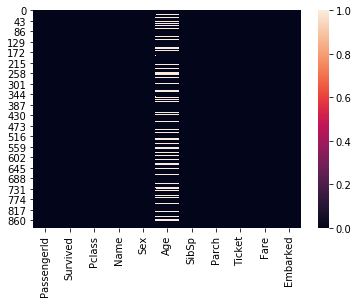

In [0]:
# your code here
sns.heatmap(titanic.isna())

In [0]:
titanic.shape

(891, 11)

In [0]:
titanic.dropna(inplace=True)

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [0]:
titanic.shape
# we dropped 179 lines, everything seems to be right

(712, 11)

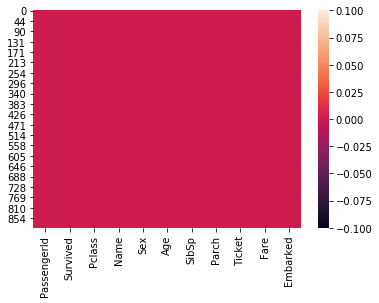

In [0]:
# your code here
sns.heatmap(titanic.isna())

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [0]:
# your code here
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [0]:
# your code here
#It looks like we have a little less survivors, and our age range goes from babies to elders


# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

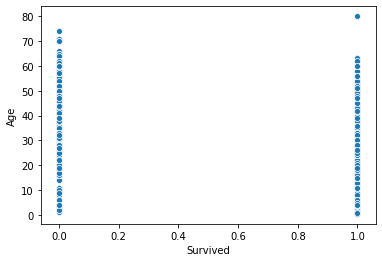

In [0]:
# your code here
sns.scatterplot("Survived","Age",data=titanic)
#it seems to be evenly distributed with fewer higher ages in the number 1 survival

Now do the same for the columns 'Fare' and 'Survived'

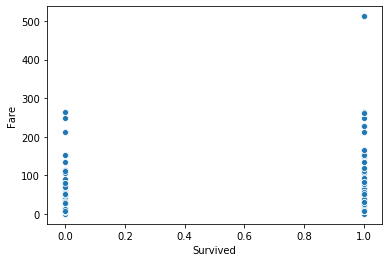

In [0]:
# your code here
sns.scatterplot("Survived","Fare",data=titanic)
# they also seem to be similar except for the fact that the richest 

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

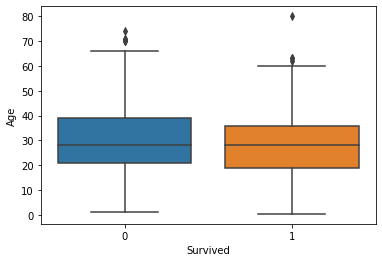

In [0]:
# your code here
sns.boxplot("Survived","Age",data=titanic)

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [0]:
# your code here
pd.crosstab(titanic["Age"],titanic["Survived"])

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


Now perform the same operation for `Pclass` and `Survived`

In [0]:
# your code here
pd.crosstab(titanic["Pclass"],titanic["Survived"])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


What can you infer from that?

In [0]:
# your code here
#This method is better for categorical variables

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [0]:
# your code here
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


2. Correlation Heatmap

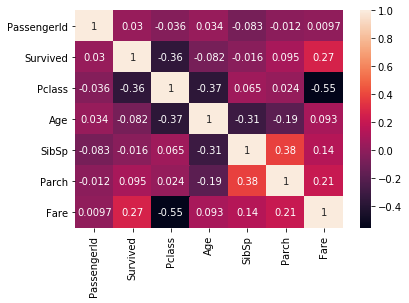

In [0]:
# your code here
sns.heatmap(titanic.corr(),annot=True)

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [0]:
# your code here
# Considering the value of -0.082 there seems to be no linear correlation between age and survival

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

(0, 98.16854187931696)

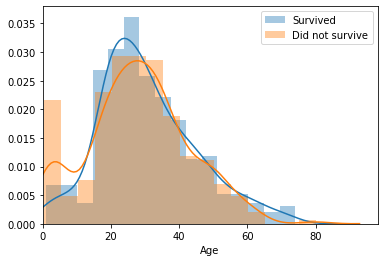

In [0]:
# your code here
import matplotlib.pyplot as plt
sns.distplot(titanic.Age[titanic["Survived"]==0],label="Survived")
sns.distplot(titanic.Age[titanic["Survived"]==1],label="Did not survive")
plt.legend()
plt.xlim(0)

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

(0, 27.725688101336196)

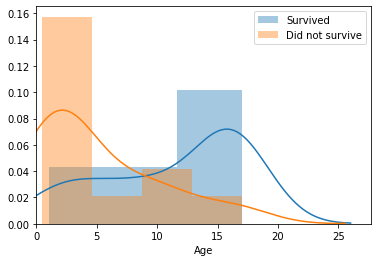

In [0]:
# your code here
sns.distplot(titanic.Age[(titanic["Survived"]==0)&(titanic["Age"]<18)&(titanic["Sex"]=="male")],label="Survived")
sns.distplot(titanic.Age[(titanic["Survived"]==1)&(titanic["Age"]<18)&(titanic["Sex"]=="male")],label="Did not survive")
plt.legend()
plt.xlim(0)

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [0]:
# your code here
# if we separate by gender the age becames relavant, there may be a linear correlation if we filter the data in different groups

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [0]:
# your code here
print("the first group average survival is ",np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]<9)]["Survived"]))
print("the first group average survival is ",np.mean(titanic[(titanic["Sex"]=="male") & (titanic["Age"]>9) & (titanic["Age"]<18)]["Survived"]))

the first group average survival is  0.6071428571428571
the first group average survival is  0.15384615384615385


*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?
He did not survive

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [0]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [0]:
y = titanic["Survived"]

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [0]:
X_dummy=pd.get_dummies(X,drop_first=True)

# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_dummy,y)

# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [0]:
titanic_train = pd.concat([X_train,y_train],axis=1)
titanic_test = pd.concat([X_test,y_test],axis=1)

# And store it on your own folder.

In [0]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)